<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: **NADIPELLI RUCHITHA**

COURSE: **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**

ASS_14 : RANDOM FOREST

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df =pd.read_excel('/content/glass.xlsx',sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
## checking missing values
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7])

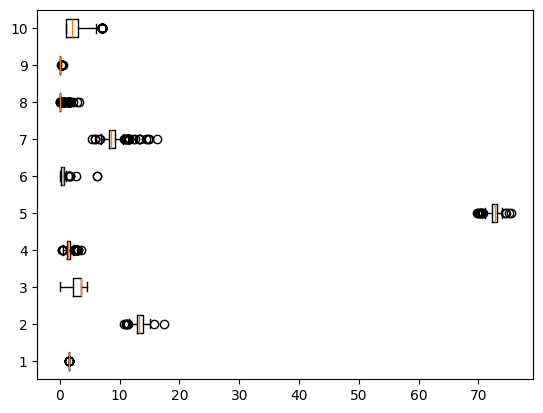

In [ ]:
# Visualizations:
plt.boxplot(df, vert=False)
plt.show()

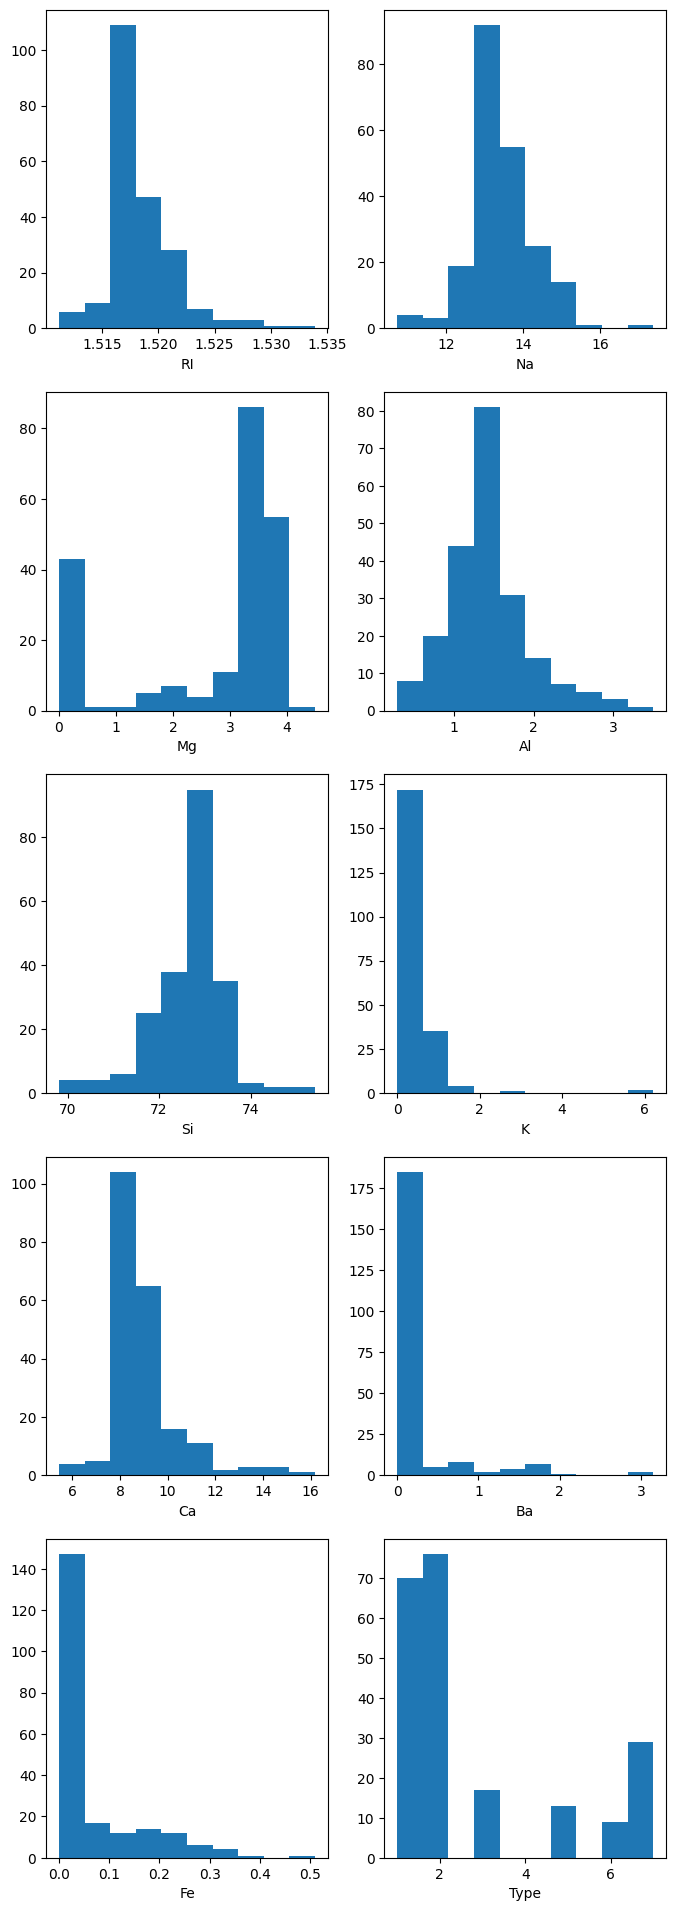

In [ ]:
length = len(df.columns)
plt.figure(figsize=(8, 24))
for i in range(1, length+1):
    plt.subplot(int(length/2), 2, i)
    plt.hist(df[df.columns[i-1]])
    plt.xlabel(f'{df.columns[i-1]}')

plt.show()

<Axes: >

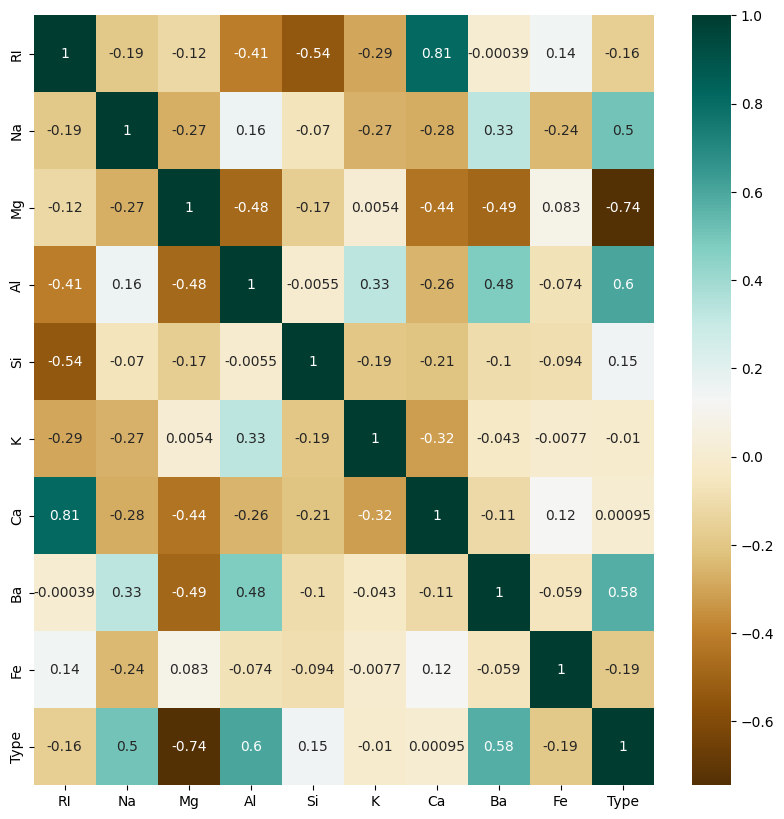

In [ ]:
# Corelations:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap= plt.cm.BrBG)

In [ ]:
## spliting columns into features and target columns:
features = df.drop('Type', axis=1)
target = df['Type']
print(features.shape, target.shape)

(214, 9) (214,)


In [ ]:
st = StandardScaler()

In [ ]:
arr = st.fit_transform(features)
arr

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [ ]:
features = pd.DataFrame(arr, columns=features.columns)
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [ ]:
#Spliting data into train test:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(171, 9) (43, 9) (171,) (43,)


In [ ]:
## Handdle imbalanced dataset:
rd = RandomOverSampler(random_state=42)
x_train, y_train = rd.fit_resample(x_train, y_train)
print(x_train.shape, y_train.shape)

(360, 9) (360,)


In [ ]:
##Rndom forest:
rf = RandomForestClassifier(n_estimators=50, max_samples=1.0, max_features='log2', bootstrap=True)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=1.0, n_estimators=50)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)*100

86.04651162790698

In [ ]:
##BaggingClassifier:
bg = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, max_features=0.9, max_samples=1.0, bootstrap=True)
bg.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.9,
                  n_estimators=50)

In [ ]:
y_pred =bg.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)*100

83.72093023255815

In [ ]:
##Boosting:
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, subsample=0.9)
gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=50, subsample=0.9)

In [ ]:
y_pred =gb.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)*100

83.72093023255815

Bagging and random forest Classifier Having same 83% score and In boosting classifier has 83% score.

## Additional answers:
1)

i)Bagging: Bagging is an ensemble technique that combines the predictions of multiple independent models (typically the same algorithm) trained on different subsets of the training data to improve overall performance
Bagging is suitable for reducing overfitting in high-variance models like decision trees.

ii)Boosting: Boosting is an ensemble technique that builds models sequentially. Each model focuses on correcting the errors made by the previous ones.
Boosting is suitable for achieving high accuracy in complex datasets where bias is an issue.

2)
Increase the number of minority class samples.








i)Random Oversampling: Duplicate existing samples from the minority class randomly.











ii)SMOTE (Synthetic Minority Oversampling Technique): Create synthetic samples by interpolating between existing minority class samples.